In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
os.chdir(r'C:\Users\gaura\Downloads')

In [3]:
df= pd.read_csv('RELIANCE.csv')
df

Date         Open         High          Low        Close  \
0     1996-01-01    15.859429    15.944529    15.754989    15.917452   
1     1996-01-02    15.878770    15.956133    15.677626    15.793671   
2     1996-01-03    16.052837    16.783918    15.878770    15.913584   
3     1996-01-04    15.762726    15.813012    15.553845    15.766594   
4     1996-01-05    15.704703    15.704703    15.522900    15.658285   
...          ...          ...          ...          ...          ...   
6393  2021-05-17  1937.300049  1963.449951  1930.400024  1960.349976   
6394  2021-05-18  1981.000000  2002.599976  1972.500000  1987.949951   
6395  2021-05-19  1980.000000  2016.449951  1972.000000  1997.050049   
6396  2021-05-20  1997.900024  2010.900024  1981.000000  1985.400024   
6397  2021-05-21  1992.000000  2009.599976  1986.000000  2002.550049   

        Adj Close       Volume  
0       10.543346   48051995.0  
1       10.461358   77875009.0  
2       10.540785   96602936.0  
3       10.443419  100099436.0  
4       10.371678   76935930.0  
...           ...          ...  
6393  1960.349976    5479424.0  
6394  1987.949951    5567958.0  
6395  1997.050049    7530294.0  
6396  1985.400024    5271497.0  
6397  2002.550049    4977555.0  

[6398 rows x 7 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6398 non-null   object 
 1   Open       6381 non-null   float64
 2   High       6381 non-null   float64
 3   Low        6381 non-null   float64
 4   Close      6381 non-null   float64
 5   Adj Close  6381 non-null   float64
 6   Volume     6381 non-null   float64
dtypes: float64(6), object(1)
memory usage: 350.0+ KB


In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
fig = px.line(df, x='Date', y='Close', title='CLOSING VALUES')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [7]:
df1=df.set_index('Date')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

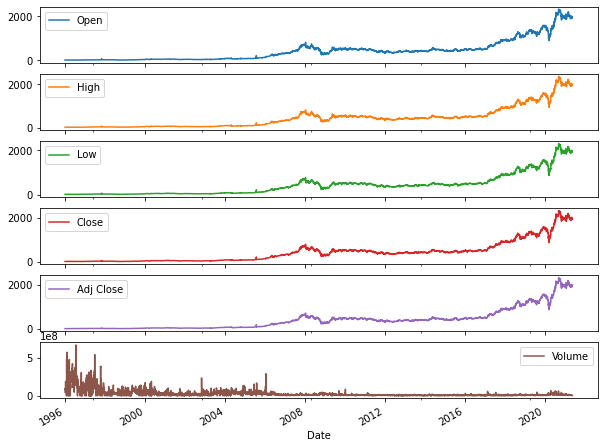

In [8]:
df1.plot(subplots=True)

In [9]:
df1.resample('D').mean()

Open         High          Low        Close    Adj Close  \
Date                                                                          
1996-01-01    15.859429    15.944529    15.754989    15.917452    10.543346   
1996-01-02    15.878770    15.956133    15.677626    15.793671    10.461358   
1996-01-03    16.052837    16.783918    15.878770    15.913584    10.540785   
1996-01-04    15.762726    15.813012    15.553845    15.766594    10.443419   
1996-01-05    15.704703    15.704703    15.522900    15.658285    10.371678   
...                 ...          ...          ...          ...          ...   
2021-05-17  1937.300049  1963.449951  1930.400024  1960.349976  1960.349976   
2021-05-18  1981.000000  2002.599976  1972.500000  1987.949951  1987.949951   
2021-05-19  1980.000000  2016.449951  1972.000000  1997.050049  1997.050049   
2021-05-20  1997.900024  2010.900024  1981.000000  1985.400024  1985.400024   
2021-05-21  1992.000000  2009.599976  1986.000000  2002.550049  2002.550049   

                 Volume  
Date                     
1996-01-01   48051995.0  
1996-01-02   77875009.0  
1996-01-03   96602936.0  
1996-01-04  100099436.0  
1996-01-05   76935930.0  
...                 ...  
2021-05-17    5479424.0  
2021-05-18    5567958.0  
2021-05-19    7530294.0  
2021-05-20    5271497.0  
2021-05-21    4977555.0  

[9273 rows x 6 columns]

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

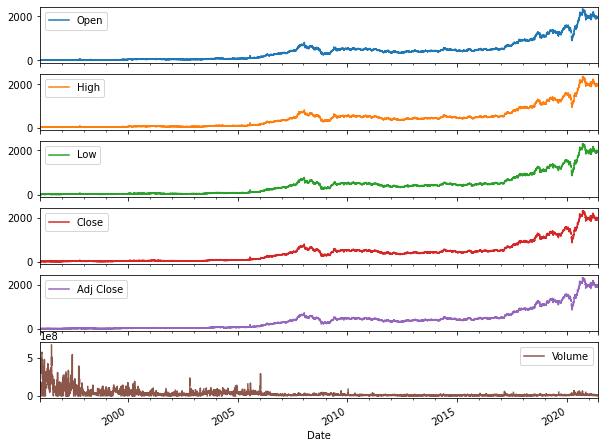

In [10]:
df1.resample('D').mean().plot(subplots=True)

In [11]:
df1_daily=df1.resample('D').mean()

In [14]:
from fbprophet import Prophet

In [15]:
ny_df_final=df1_daily.reset_index()[['Date','Close']].rename({'Date':'ds','Close':'y'}, axis='columns')

In [16]:
ny_df_final

ds            y
0    1996-01-01    15.917452
1    1996-01-02    15.793671
2    1996-01-03    15.913584
3    1996-01-04    15.766594
4    1996-01-05    15.658285
...         ...          ...
9268 2021-05-17  1960.349976
9269 2021-05-18  1987.949951
9270 2021-05-19  1997.050049
9271 2021-05-20  1985.400024
9272 2021-05-21  2002.550049

[9273 rows x 2 columns]

In [17]:
train=ny_df_final[(ny_df_final['ds'] >= '1996-01-1') & (ny_df_final['ds'] <= '2019-12-31')]
test=ny_df_final[(ny_df_final['ds'] > '2019-12-31')]

In [18]:
train.shape

(8766, 2)

In [19]:
test.shape

(507, 2)

In [20]:
test

ds            y
8766 2020-01-01  1495.424927
8767 2020-01-02  1520.883545
8768 2020-01-03  1522.716187
8769 2020-01-04          NaN
8770 2020-01-05          NaN
...         ...          ...
9268 2021-05-17  1960.349976
9269 2021-05-18  1987.949951
9270 2021-05-19  1997.050049
9271 2021-05-20  1985.400024
9272 2021-05-21  2002.550049

[507 rows x 2 columns]

In [21]:
m = Prophet(interval_width=0.90,yearly_seasonality=True)

In [22]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
m.params

{'k': array([[0.0644896]]),
 'm': array([[0.00978485]]),
 'delta': array([[ 3.18226278e-07,  3.78640111e-08,  6.83695324e-06,
          7.29324641e-02, -7.85189948e-08, -6.05657581e-03,
         -1.48198952e-01, -3.55074945e-08,  2.01616625e-01,
          9.86403785e-02,  8.75414723e-07,  4.07441267e-02,
          2.08011896e+00,  4.86279248e-01,  2.43864245e+00,
         -9.69687188e+00,  5.30844193e+00, -2.08012581e-07,
         -1.92092834e+00, -4.81107011e-01,  1.13906945e+00,
          1.25675757e+00,  1.59488154e-04, -4.35649258e+00,
          6.62766340e+00]]),
 'sigma_obs': array([[0.03514832]]),
 'beta': array([[-2.17381127e-03, -8.09799789e-04, -2.25466134e-03,
         -8.51277617e-04, -7.46309050e-04,  1.06901359e-03,
          8.93399354e-04,  7.64731517e-05, -1.37312177e-04,
         -3.43376451e-04,  2.20639337e-05, -4.82772519e-04,
         -5.68700821e-05,  1.74030192e-04,  1.12279435e-04,
         -1.02038368e-03,  5.84346308e-05, -1.30867359e-04,
         -6.25382250

In [24]:
future = m.make_future_dataframe(periods=200)
future.tail()

ds
8961 2020-07-14
8962 2020-07-15
8963 2020-07-16
8964 2020-07-17
8965 2020-07-18

In [25]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
8961 2020-07-14  1461.175062  1362.199329  1566.145926
8962 2020-07-15  1461.752923  1359.108732  1565.677437
8963 2020-07-16  1462.843890  1367.439571  1565.035064
8964 2020-07-17  1463.255417  1362.155075  1573.674424
8965 2020-07-18  1464.845058  1355.200807  1558.540965

<AxesSubplot:xlabel='ds'>

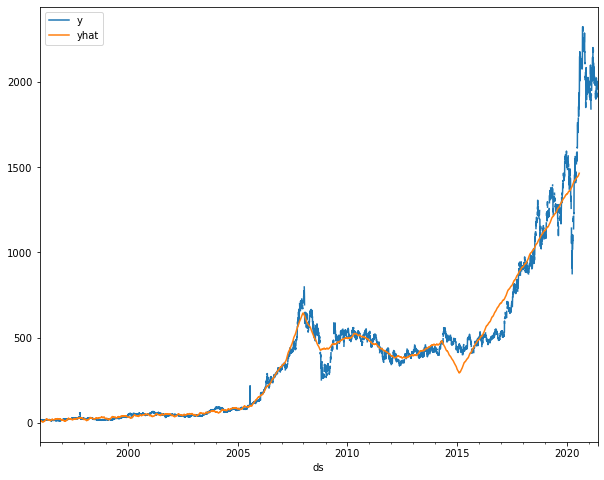

In [26]:
pd.concat([ny_df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

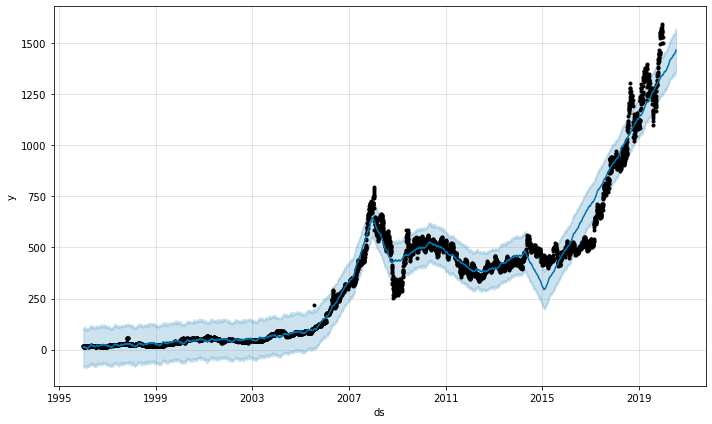

In [27]:
fig1 = m.plot(forecast)

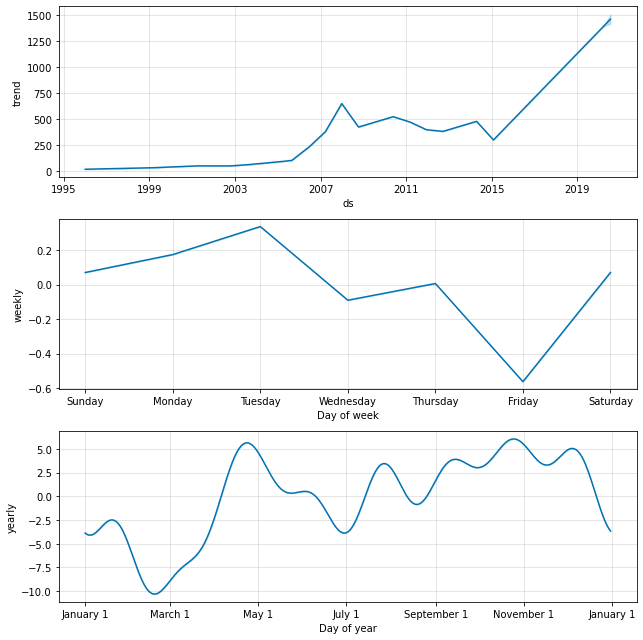

In [28]:
fig2 = m.plot_components(forecast)

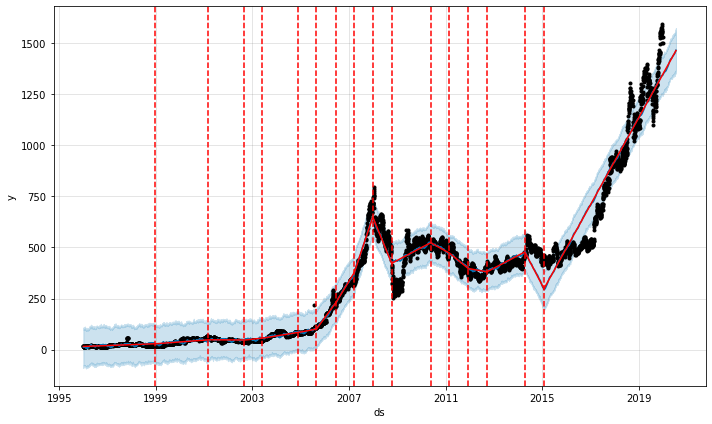

In [29]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [30]:
deltas = m.params['delta'].mean(0)
deltas

array([ 3.18226278e-07,  3.78640111e-08,  6.83695324e-06,  7.29324641e-02,
       -7.85189948e-08, -6.05657581e-03, -1.48198952e-01, -3.55074945e-08,
        2.01616625e-01,  9.86403785e-02,  8.75414723e-07,  4.07441267e-02,
        2.08011896e+00,  4.86279248e-01,  2.43864245e+00, -9.69687188e+00,
        5.30844193e+00, -2.08012581e-07, -1.92092834e+00, -4.81107011e-01,
        1.13906945e+00,  1.25675757e+00,  1.59488154e-04, -4.35649258e+00,
        6.62766340e+00])

In [31]:
m.changepoints

193    1996-09-26
386    1997-06-24
579    1998-03-20
772    1998-12-16
966    1999-09-14
1159   2000-06-09
1352   2001-03-07
1545   2001-12-03
1738   2002-08-29
1931   2003-05-28
2124   2004-02-23
2317   2004-11-22
2511   2005-08-26
2704   2006-06-12
2897   2007-03-21
3090   2007-12-28
3283   2008-10-08
3476   2009-07-29
3669   2010-05-21
3862   2011-02-23
4056   2011-12-09
4249   2012-09-17
4442   2013-07-02
4635   2014-04-15
4828   2015-01-29
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


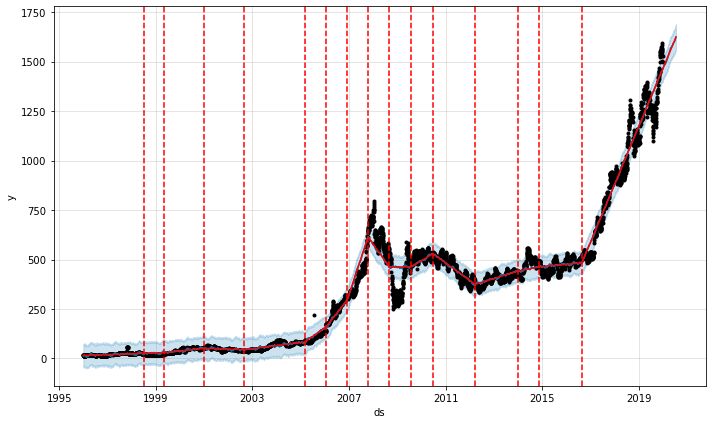

In [32]:
pro_change= Prophet(changepoint_range = 0.9, yearly_seasonality=True)
forecast = pro_change.fit(train).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [33]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m, forecast)
py.iplot(fig)

In [34]:
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation( model = m, initial = '100 days', horizon = '110 days')

INFO:fbprophet:Making 156 forecasts with cutoffs between 1996-05-10 00:00:00 and 2019-09-12 00:00:00


In [37]:
cv_results.head()

ds       yhat  yhat_lower  yhat_upper          y     cutoff
0 1996-05-13  17.814825   16.993659   18.664842  19.062262 1996-05-10
1 1996-05-14  17.539658   16.759549   18.317403  19.592197 1996-05-10
2 1996-05-15  17.558954   16.737570   18.364545  19.634747 1996-05-10
3 1996-05-16  17.492967   16.662570   18.323832  19.746923 1996-05-10
4 1996-05-17  17.399447   16.545539   18.230875  19.356239 1996-05-10

In [38]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

horizon           mse        rmse        mae      mape     mdape  coverage
0   11 days   8389.059498   91.591809  51.011439  0.141314  0.108091  0.531255
1   12 days   8532.382733   92.370898  51.657106  0.144725  0.111101  0.525074
2   13 days   8689.937622   93.219835  52.126504  0.148150  0.111530  0.518870
3   14 days   8712.732810   93.342021  52.159308  0.150153  0.113065  0.513964
4   15 days   8556.060296   92.498975  51.821340  0.150744  0.114165  0.509754
..      ...           ...         ...        ...       ...       ...       ...
95 106 days  13393.838123  115.731751  67.332140  0.270768  0.169465  0.368659
96 107 days  13470.358401  116.061873  67.145638  0.260840  0.168760  0.372314
97 108 days  13712.827886  117.101784  67.578267  0.253106  0.171184  0.362367
98 109 days  13702.828130  117.059080  67.697523  0.245206  0.172535  0.355684
99 110 days  13924.450931  118.001911  68.452077  0.249209  0.173049  0.352876

[100 rows x 7 columns]